1.Importing the necessary libraries


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

2. Importing the data from .csv file

In [85]:

df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3.Rename Columns to avoid space and Naming errors 

In [86]:

df.rename(columns={"CustomerID": "CustomerID", "Gender": "Gender",'Age':'Age',"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":"Score"},inplace=True)

4.Viewing and Describing the data

In [87]:

df.describe()

,CustomerID,Age,Annual_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5.Clean the data

In [88]:
#checking missing values by calacute the sum of all nan values
df.isna().sum()

CustomerID       0
Gender           0
Age              0
Annual_Income    0
Score            0
dtype: int64

In [89]:
#checking duplicate rows
df.duplicated().sum()


0

<AxesSubplot:xlabel='Age'>

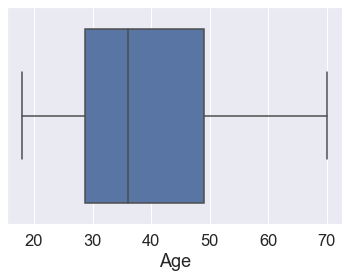

In [90]:
#Checking Outliers by using box plot if there is values greater or less than the mininmum and maximum consider as outliers
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Annual_Income'>

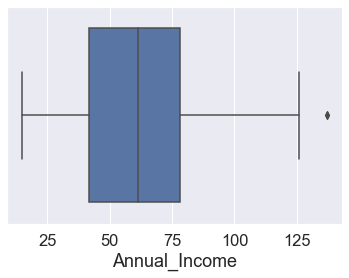

In [91]:
#Checking Outliers
sns.boxplot(x=df["Annual_Income"])

6. preprocssing to the data

In [92]:
#clipping the Annual income beacuse there is outlier 
#by return the outlier value to the maximimum 
df['Annual_Income'] = np.where(df.Annual_Income > 125, 125, df.Annual_Income)

<AxesSubplot:xlabel='Annual_Income'>

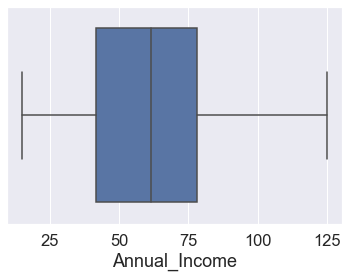

In [93]:
#Checking Outliers
sns.boxplot(x=df["Annual_Income"])

<AxesSubplot:xlabel='Score'>

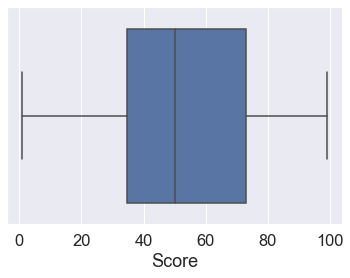

In [94]:
#Checking Outliers
sns.boxplot(x=df["Score"])

7. Visualize the data

c:\Users\SAEDY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

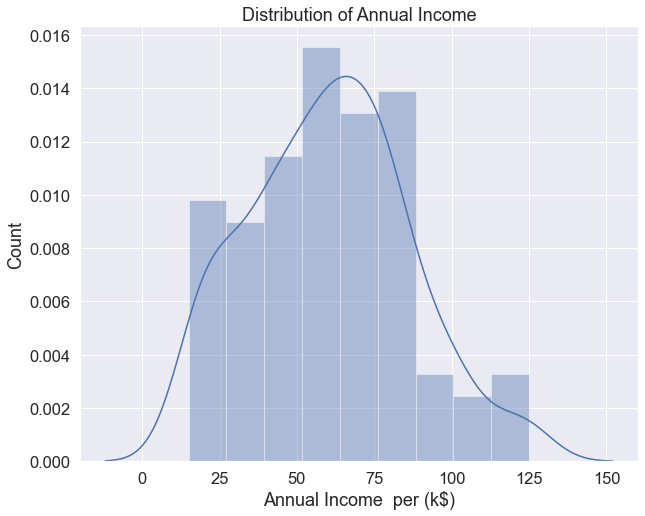

In [95]:
#Distribution of Annnual Income if it normal or not
plt.figure(figsize=(10, 8))
sns.distplot(df['Annual_Income'])
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income  per (k$)')
plt.ylabel('Count')

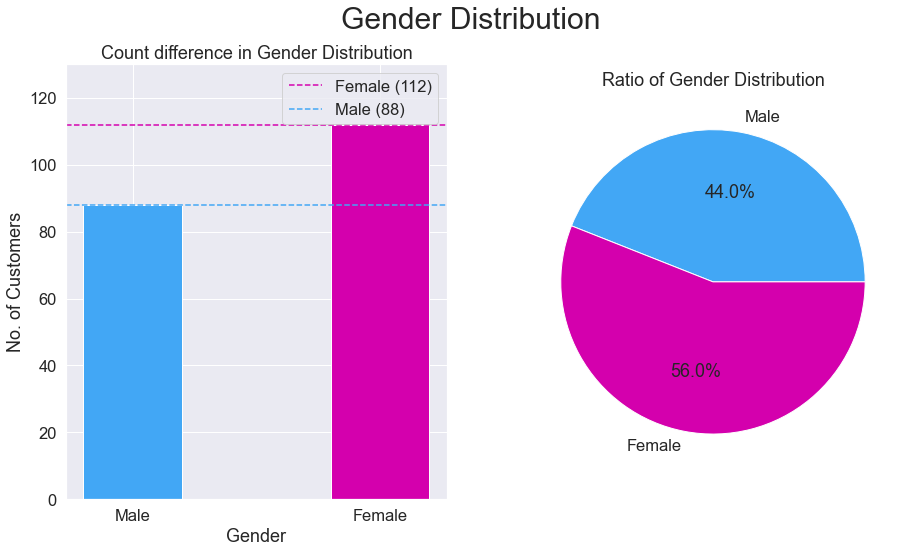

In [96]:
#the geneder is a categorial Feature so we used par or Pie chart to visuallize the values count for each value(male,female)
labels=df['Gender'].unique()
values=df['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=df['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({df.Gender.value_counts()[0]})')
ax0.axhline(y=df['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({df.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

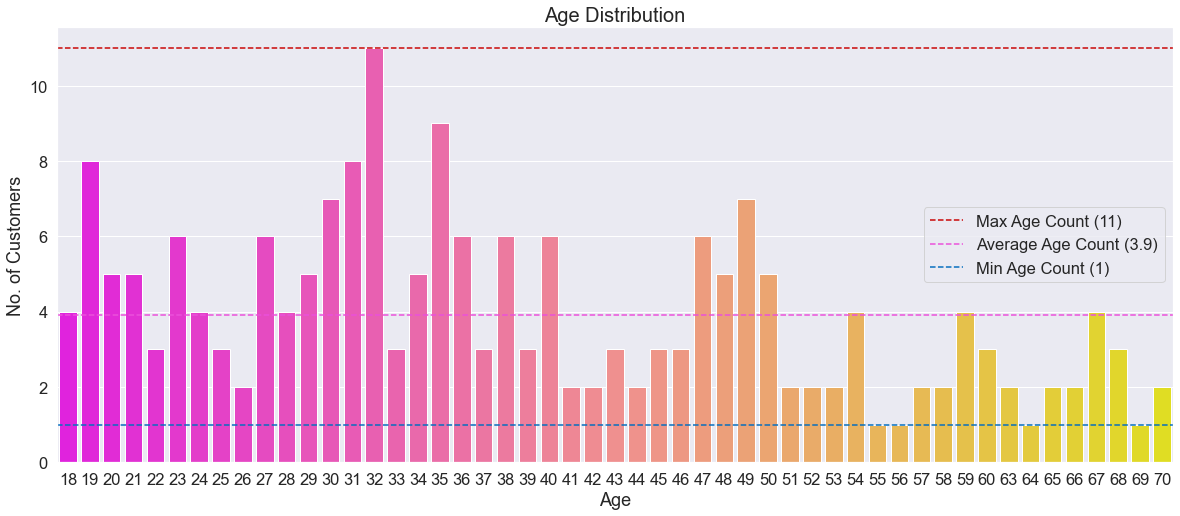

In [97]:
#Visualizing Age Distribution using a countplot.
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df['Age'], palette='spring')
ax.axhline(y=df['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({df.Age.value_counts().max()})')
ax.axhline(y=df['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({df.Age.value_counts().mean():.1f})')
ax.axhline(y=df['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({df.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

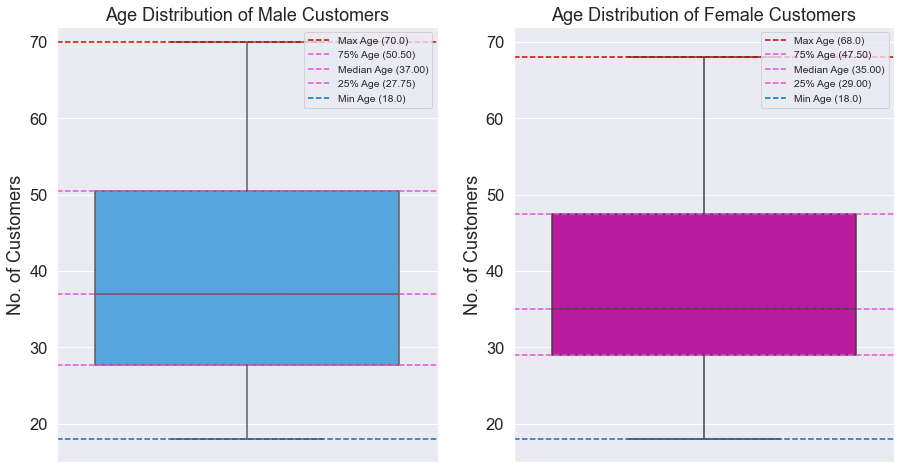

In [98]:
#Visualizing Gender wise Age Distribution of Male and Female customers on a boxplot.
data_male = df[df['Gender']=='Male']['Age'].describe()
data_female = df[df['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=df[df['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=df['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=df[df['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

Visualizing statistical difference of Annual Income between Male and Female Customers.

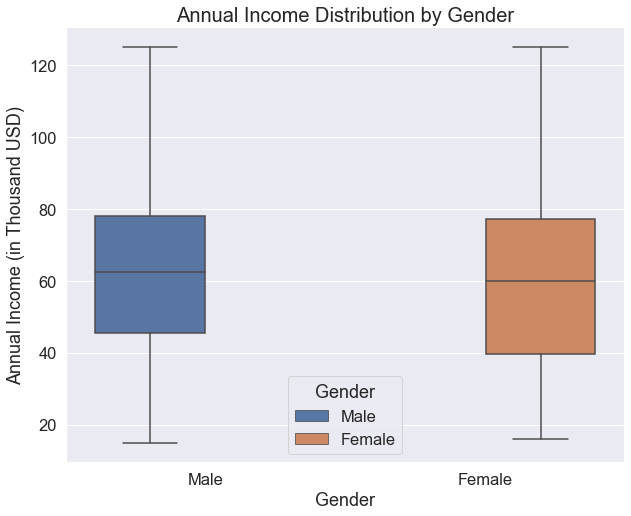

In [99]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df['Gender'], y=df["Annual_Income"], hue=df['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

Visualizing statistical difference of Spending Score between Male and Female Customers.

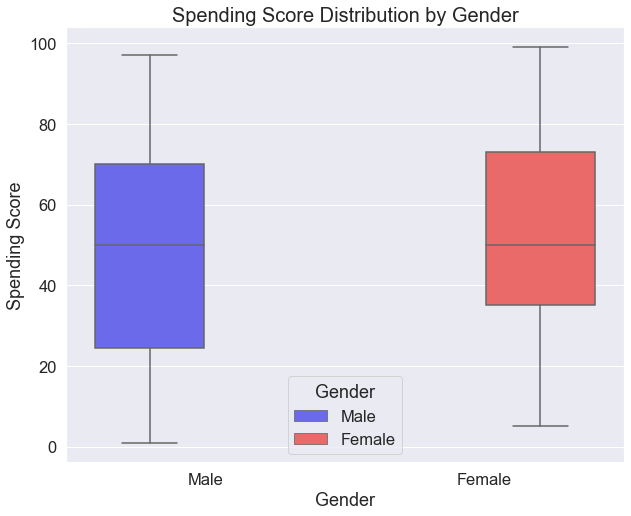

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df['Gender'], y=df["Score"], hue=df['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

In [101]:
#Finding and viewing Corelations in the data and columns using corr().
corr = df.corr()
corr

,CustomerID,Age,Annual_Income,Score
CustomerID,1.000000,-0.026763,0.982178,0.013835
Age,-0.026763,1.000000,-0.009941,-0.327227
Annual_Income,0.982178,-0.009941,1.000000,0.009971
Score,0.013835,-0.327227,0.009971,1.000000


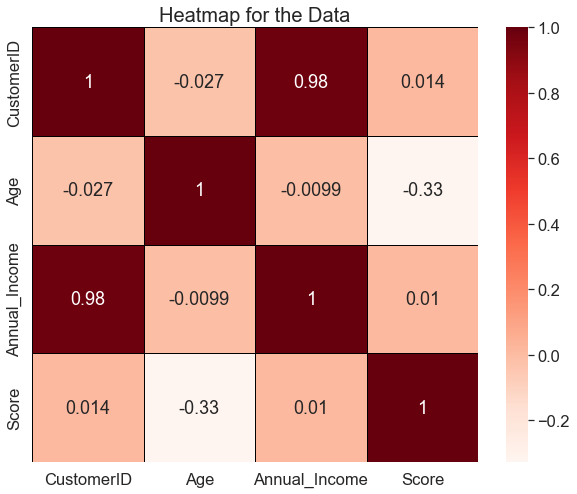

In [102]:
#Plotting the heatmap of correlation of all the columns of the dataset.
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

8.Encoding the categorial data

In [103]:

#Encoding mean convert the categorial data into numbers
#we convert the gender into 0 and 1's so we can handle it in the model
df['Gender'] = np.where(df['Gender']=='Male', 1, 0)


In [104]:
df

,CustomerID,Gender,Age,Annual_Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,125,28
197,198,1,32,125,74
198,199,1,32,125,18


9.Importing KMeans cluster from sklearn

In [105]:


#Kmean is an Algorithm dependent on Ecludian distance and mean to calc the distance Between Featur so can assume the clusters 
from sklearn.cluster import KMeans

In [106]:
#split the original data : we consider the numeric values and we not consider the customer_id
X=df[['Gender','Age','Annual_Income','Score']]
X

,Gender,Age,Annual_Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,125,28
197,1,32,125,74
198,1,32,125,18


<b>Determining No. of Clusters Required</b><br>
The Elbow Method<br>

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score<br> for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.<br>

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm,<br>
 then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection <br>point, it is a good indication that the underlying model fits best at that point.<br>

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of <br>clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

#With this simple line of code we get all the inertia value or the within the cluster sum of square

In [107]:
#we need to calc within cluster sum of square error 
#that calc the mean of values then the total error 
#but whe we sum the all values from the total error the result will be zero 
#so we sqaure each value to became total square error 
#the divided by the lenght of values -1 
#we use the kmean and km.inertia_ to To find the optimal K for a dataset,
# use the Elbow method; find the point where the decrease in inertia begins to slow

wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(df)
    wcss.append(km.inertia_)
np.array(wcss)

array([971867.8       , 384499.55535554, 269220.03355427, 193138.00411547,
       155218.94002302, 120436.86156523, 101299.49401154,  84439.11889222,
        75592.21769899,  67361.26614923,  63432.87446454,  58842.14341007,
        54689.8558312 ,  51584.97033219,  47790.21738123,  44467.76708471,
        42204.98675214,  39523.78394677,  38975.99023199,  37189.6718254 ,
        35487.29047619,  33715.1539072 ,  31058.75812504,  30234.57709235,
        28810.88593212,  28102.97409812,  26820.59805195,  25543.00198413,
        24654.65      ])

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

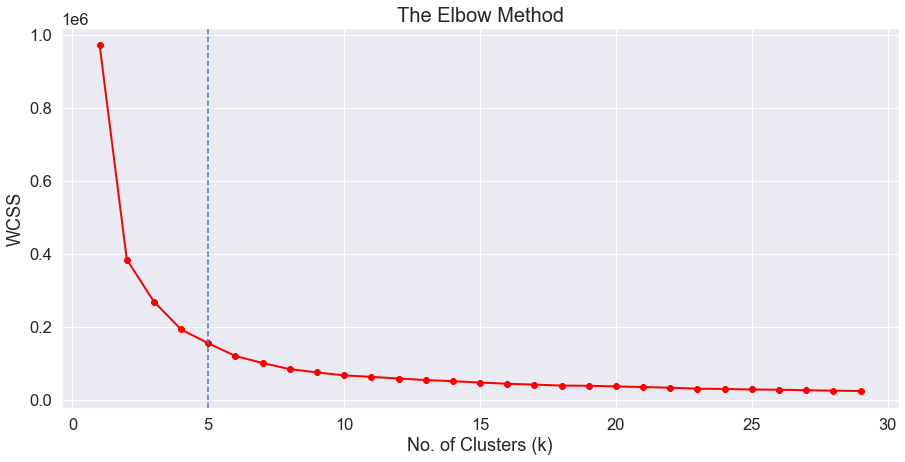

In [108]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

<h1>10.Clustering</h1>

In [109]:
#Taking 5 clusters
km_cl=KMeans(n_clusters=5)
#Fitting the input data after split it into X variable 
km_cl.fit(X)
#predicting the labels of the input data
y=km_cl.predict(X)
#adding the labels to a column named cluster
df["cluster"] = y
#The new dataframe with the clustering done
df.head()

,CustomerID,Gender,Age,Annual_Income,Score,cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,3
2,3,0,20,16,6,0
3,4,0,23,16,77,3
4,5,0,31,17,40,0


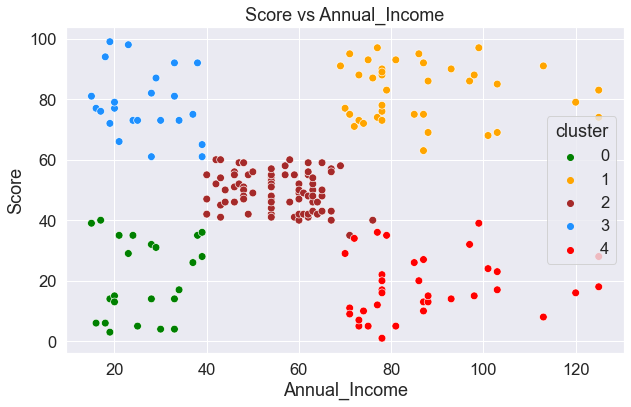

In [110]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual_Income',y = 'Score',hue="cluster",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual_Income')
plt.ylabel('Score') 
plt.title('Score vs Annual_Income')
plt.show()

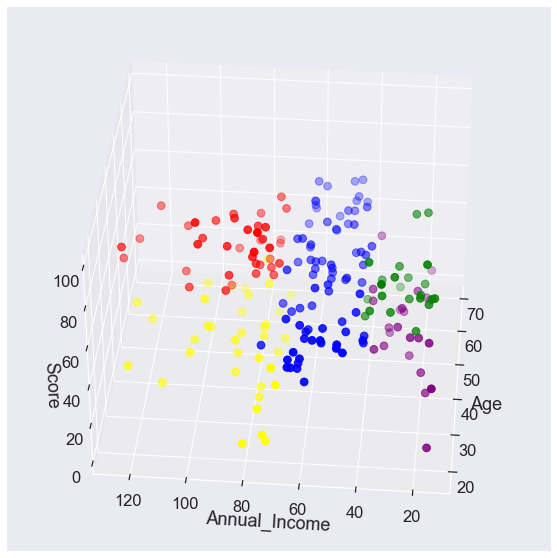

In [111]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.cluster == 0], df["Annual_Income"][df.cluster == 0], df["Score"][df.cluster == 0], c='purple', s=60)
ax.scatter(df.Age[df.cluster == 1], df["Annual_Income"][df.cluster == 1], df["Score"][df.cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.cluster == 2], df["Annual_Income"][df.cluster == 2], df["Score"][df.cluster == 2], c='blue', s=60)
ax.scatter(df.Age[df.cluster == 3], df["Annual_Income"][df.cluster == 3], df["Score"][df.cluster == 3], c='green', s=60)
ax.scatter(df.Age[df.cluster == 4], df["Annual_Income"][df.cluster == 4], df["Score"][df.cluster == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual_Income")
ax.set_zlabel('Score')
plt.show()

<h2>Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data. Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers. The following clusters are created by the model,</h2>
<ul>
<li>Cluster brown</li>
<li>Cluster green</li>
<li>Cluster Blue</li>
<li>Cluster Orange</li>
<li>Cluster red</li>
</ul>

<p>Once upon a time, there was an owner of one of the Malls, many customers used to come to him, but he did not know what to offer to whom and how to deal with them.
He decided to use one of his friends to analyze his store
The data analyst took a sample of 200 customer  and began to classify them after taking into considiration  many Features and clean and visualize the data he can classify the customer into 5 clusters  and this clusyers are : </p>


1.**Cluster orange - Balanced Customers :**

They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.


2. **Cluster Brown - Pinch Penny Customers :**
Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

3. **Cluster Blue - Normal Customer :**
Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
<br>
4. **Cluster Red - Spenders :**

This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.


5.**Cluster Green - Target Customers :**

Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.